# Mean Shift

Mean shift 클러스터링 또한 K-Means 클러스터링처럼 Centroid 기반 알고리즘입니다. 다만 K-Means와 달리 클러스터 수를 설정해 줄 필요 없습니다. 최적 Centroid 를 찾기 위해 무작위로 뿌려진 후보 Centroid를 중심으로 영역내에 데이터의 평균을 계산하여 업데이트 함으로써 고밀도 영역으로 이동시키게 됩니다.

![mean_shift_tutorial](https://dashee87.github.io/images/mean_shift_0.gif)

위 처리를 반복하면서, 후처리를 통해 중복되는 후보 Centroid를 제거해 나가며 클러스터를 찾게 됩니다. 

![mean_shift_tutorial](https://dashee87.github.io/images/mean_shift_tutorial.gif)

이 알고리즘 또한 K-Means와 같이 Circle 형태의 클러스터에서는 잘 작동하는 반면, 아래와 같은 Moon 형식의 데이터에서는 만족할 만한 성과를 내지 못합니다.

data shape: np_data_xs=(1000, 2), np_data_ys=(1000,)
data shape: np_data_xs=(1000, 2), np_data_ys=(1000,)


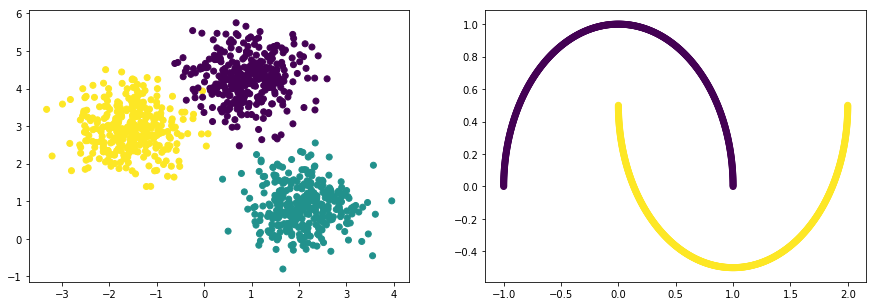


model=MeanShift(bandwidth=None, bin_seeding=False, cluster_all=True, min_bin_freq=1,
     n_jobs=None, seeds=None)
score=0.65326

model=MeanShift(bandwidth=None, bin_seeding=False, cluster_all=True, min_bin_freq=1,
     n_jobs=None, seeds=None)
fail to get score: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)


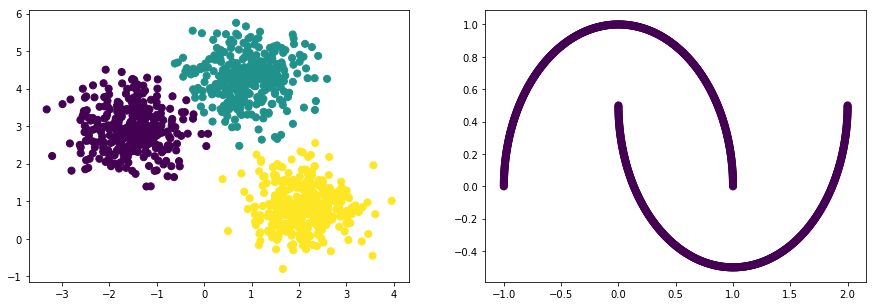

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

import numpy as np
from sklearn import datasets, model_selection, cluster, metrics

# 데이터
np.random.seed(0)
n_samples = 1000
plt.rcParams['figure.figsize'] = (15,5)

np_datasets = []
np_data_xs, np_data_ys = datasets.samples_generator.make_blobs(
    n_samples=n_samples,
    centers=3,
    cluster_std=0.60,
    random_state=0)
print("data shape: np_data_xs={}, np_data_ys={}".format(np_data_xs.shape, np_data_ys.shape))
np_datasets.append((np_data_xs, np_data_ys))
plt.subplot(1, 2, 1)
plt.scatter(np_data_xs[:, 0], np_data_xs[:, 1], c=np_data_ys)

np_data_xs, np_data_ys = datasets.make_moons(
    n_samples=n_samples,
    random_state=0)
print("data shape: np_data_xs={}, np_data_ys={}".format(np_data_xs.shape, np_data_ys.shape))
np_datasets.append((np_data_xs, np_data_ys))
plt.subplot(1, 2, 2)
plt.scatter(np_data_xs[:, 0], np_data_xs[:, 1], c=np_data_ys)

plt.show()

# 모델
models = [
    cluster.MeanShift()
]

for model in models:
    for i, np_dataset in enumerate(np_datasets):
        np_data_xs, np_data_ys = np_dataset[0], np_dataset[1]

        # 학습
        print("\nmodel={}".format(model))
        model.fit(np_data_xs)

        # 평가
        labels = model.labels_
        plt.subplot(1, 2, i+1)
        plt.scatter(np_data_xs[:, 0], np_data_xs[:, 1], c=labels, s=50, cmap='viridis')    

        try:            
            score = metrics.silhouette_score(np_data_xs, labels, metric='euclidean')
            print("score={:.5f}".format(score))
        except ValueError as e:
            print("fail to get score: {}".format(e))
    plt.show()